*Introduction to problem:* 
How does an individual choose what hospital to go to if they have a condition which requires the individual to be admitted in for care? The natural answer comes down to how efficient a hospital is. One such measure of efficiency is Average Length of stay. Average Length of stay: The average length of stay in hospitals (ALOS) is often used as an indicator of efficiency. All other things being equal, a shorter stay will reduce the cost per discharge and shift care from inpatient to less expensive post acute settings. The ALOS refers to the average number of days that patients spend in hospital. It is generally measured by dividing the total number of days stayed by all inpatients during a year by the number of admissions or discharges. Day cases are excluded. The indicator is presented both for all acute care cases and for childbirth without complications.

In this assignment, we aim to classify the ALOS in two categories, less than 4 days or otherwise, this would help hospitals increase their efficiency and management.


In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.precision", 3)
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina'

In [2]:
data = pd.read_csv('train_data.csv', index_col = 'ID', usecols = ['ID', 'Gender', 'Race', 'TypeOfAdmission', 'CCSProcedureCode',
                                                                  'APRSeverityOfIllnessCode', 'PaymentTypology', 'BirthWeight',
                                                                 'EmergencyDepartmentIndicator', 'AverageCostInCounty',
                                                                  'AverageChargesInCounty', 'AverageCostInFacility',
                                                                  'AverageChargesInFacility', 'AverageIncomeInZipCode', 'LengthOfStay'])

In [3]:
data.head()

,Gender,Race,TypeOfAdmission,CCSProcedureCode,APRSeverityOfIllnessCode,PaymentTypology,BirthWeight,EmergencyDepartmentIndicator,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,LengthOfStay
ID,,,,,,,,,,,,,,
1,F,Other Race,Newborn,228,1,Medicaid,3700,N,2611,9227,1751,8951,45,1
2,M,Black/African American,Newborn,228,1,Medicaid,2900,N,3242,8966,3338,6409,34,1
3,M,Other Race,Newborn,220,1,Private Health Insurance,3200,N,3155,11381,4980,9323,45,1
4,F,Other Race,Newborn,0,1,Private Health Insurance,3300,N,3155,11381,5826,15680,59,1
5,F,Other Race,Newborn,228,1,Medicaid,2600,N,2611,9227,6000,14344,59,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59966 entries, 1 to 59966
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Gender                        59966 non-null  object
 1   Race                          59966 non-null  object
 2   TypeOfAdmission               59966 non-null  object
 3   CCSProcedureCode              59966 non-null  int64 
 4   APRSeverityOfIllnessCode      59966 non-null  int64 
 5   PaymentTypology               59966 non-null  object
 6   BirthWeight                   59966 non-null  int64 
 7   EmergencyDepartmentIndicator  59966 non-null  object
 8   AverageCostInCounty           59966 non-null  int64 
 9   AverageChargesInCounty        59966 non-null  int64 
 10  AverageCostInFacility         59966 non-null  int64 
 11  AverageChargesInFacility      59966 non-null  int64 
 12  AverageIncomeInZipCode        59966 non-null  int64 
 13  LengthOfStay    

No null values

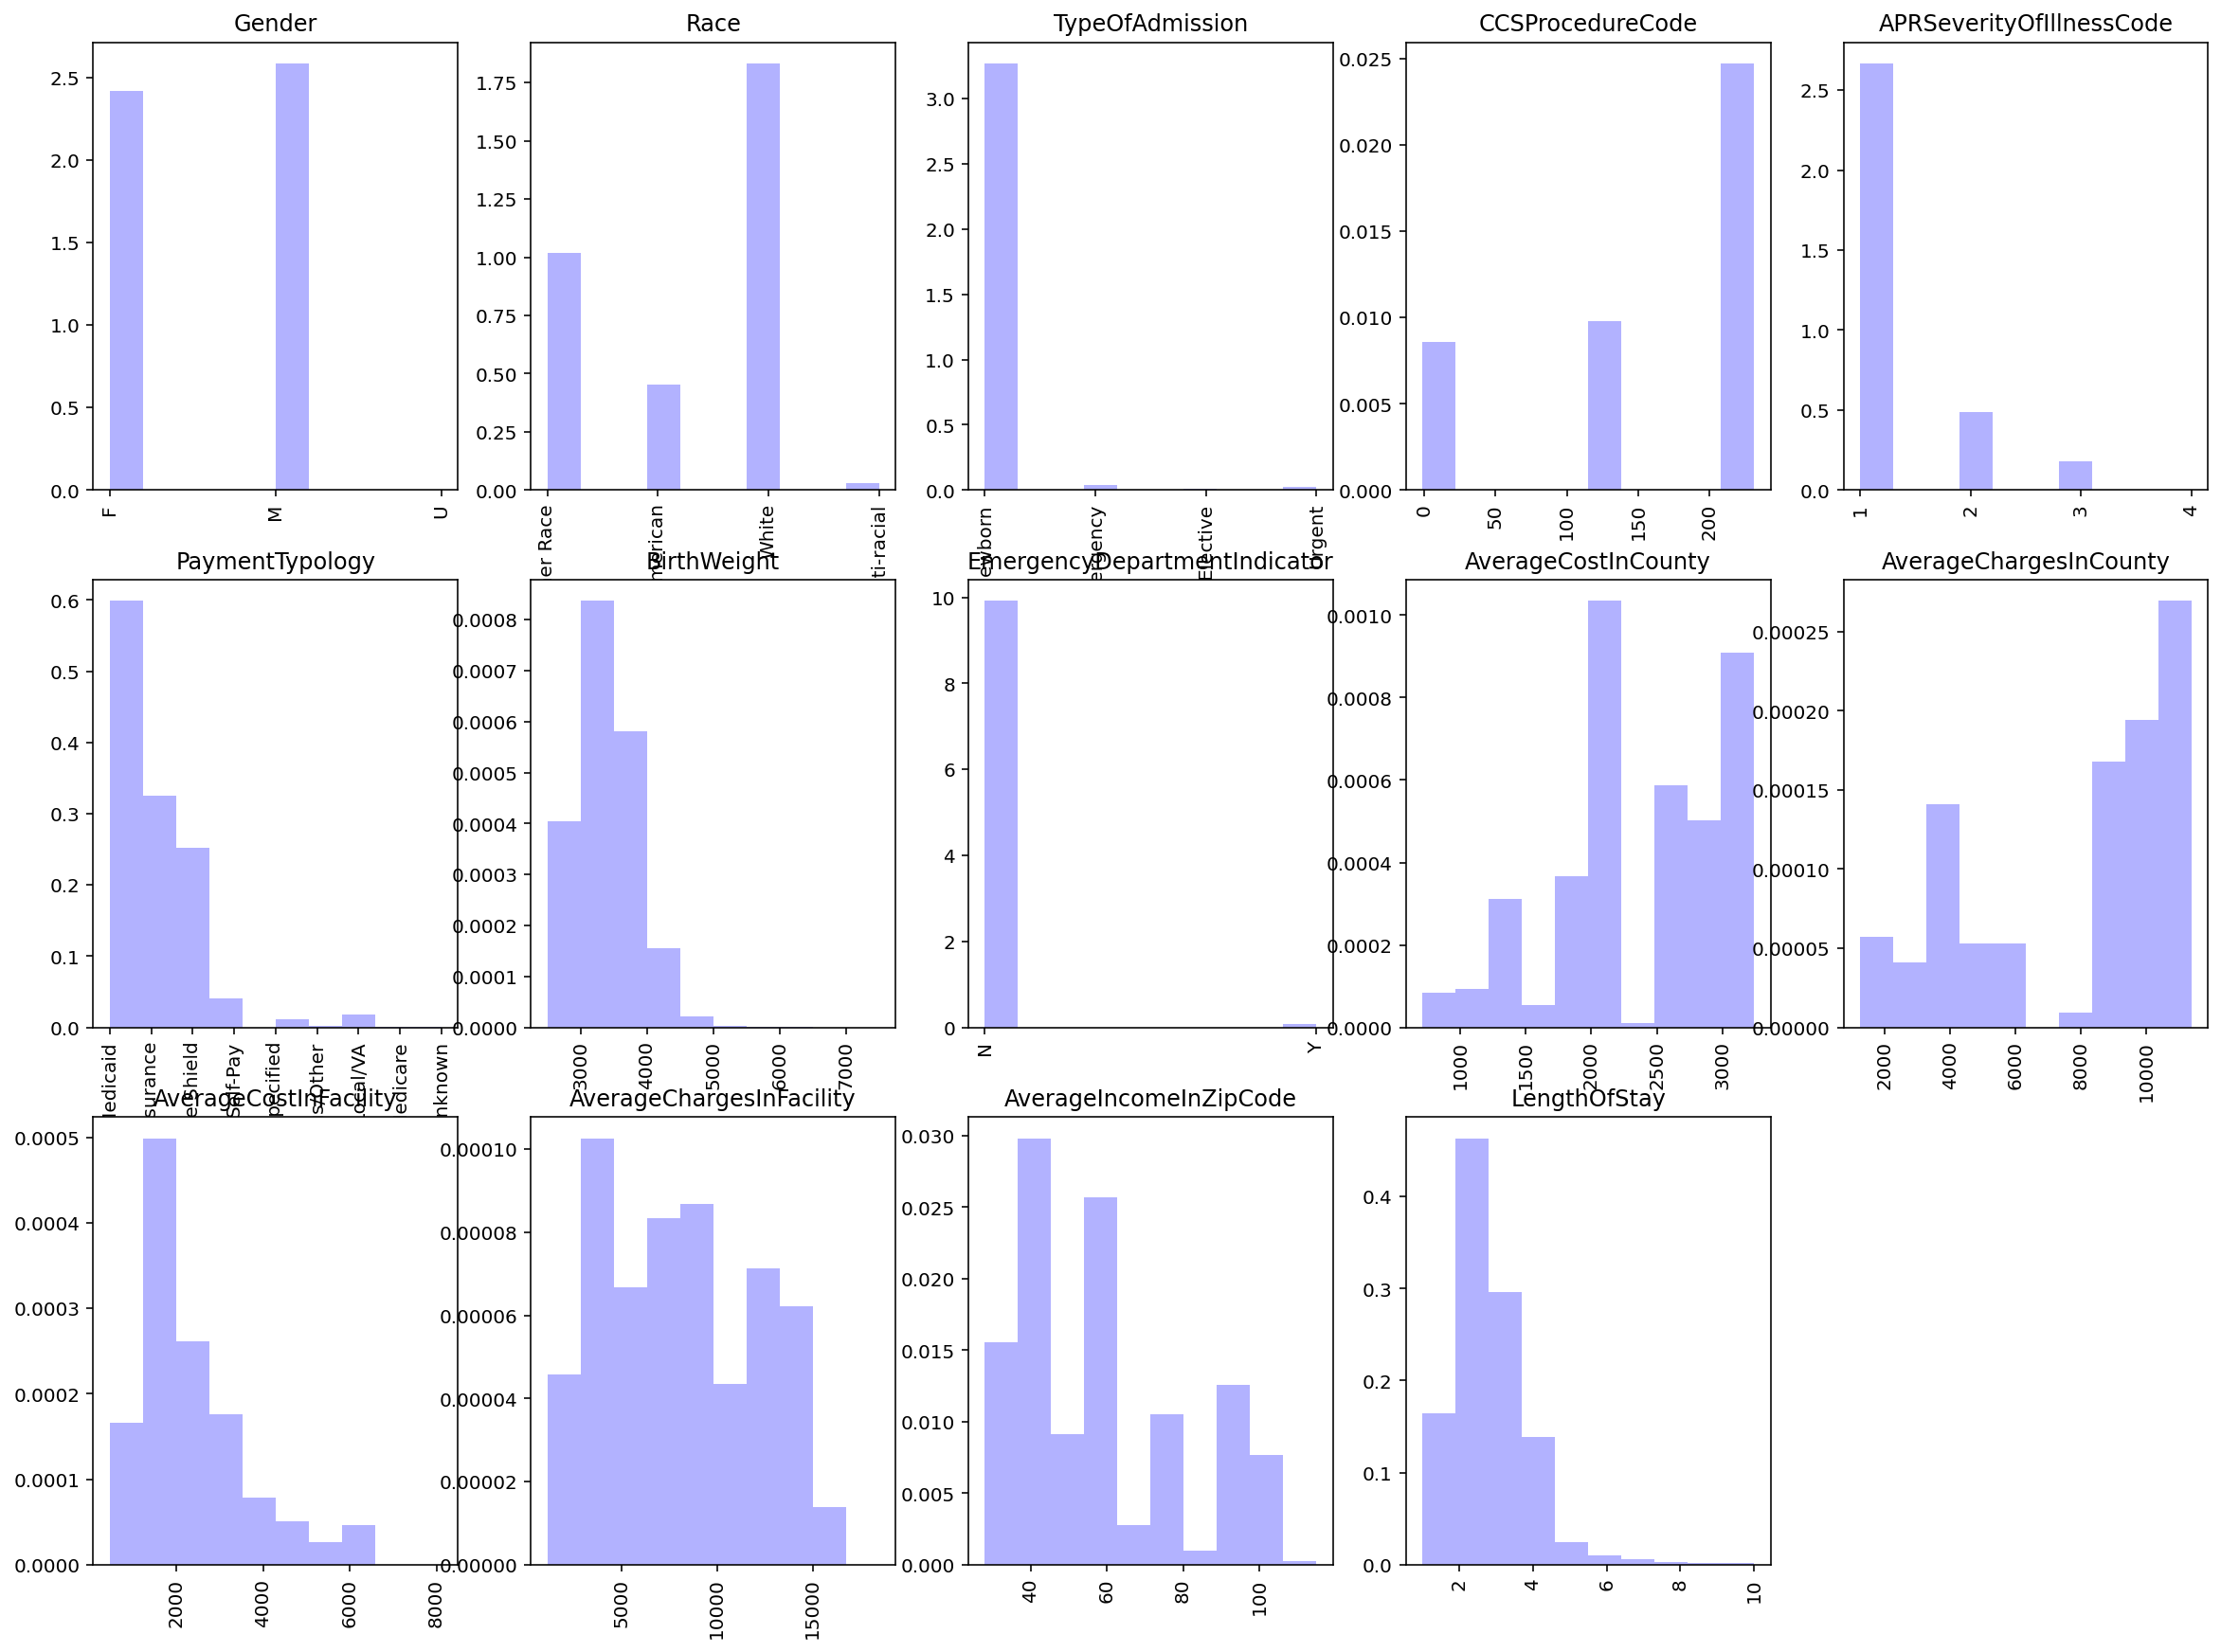

In [5]:
plt.figure(figsize=(20,20))
for i, col in enumerate(data.columns):
    plt.subplot(4,5,i+1)
    plt.hist(data[col], alpha=0.3, color='b', density=True)
    plt.title(col)
    plt.xticks(rotation='vertical')

In [6]:
data.CCSProcedureCode = data.CCSProcedureCode.astype('category')
severity_dtype = pd.api.types.CategoricalDtype(
    categories=[1, 2, 3, 4], ordered=True)
data.APRSeverityOfIllnessCode = data.APRSeverityOfIllnessCode.astype(severity_dtype)
data.loc[data.EmergencyDepartmentIndicator == "Y", "EmergencyDepartmentIndicator"] = True
data.loc[data.EmergencyDepartmentIndicator == "N", "EmergencyDepartmentIndicator"] = False
data.EmergencyDepartmentIndicator = data.EmergencyDepartmentIndicator.astype('bool')
data.LengthOfStay = data.LengthOfStay > 3

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59966 entries, 1 to 59966
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Gender                        59966 non-null  object  
 1   Race                          59966 non-null  object  
 2   TypeOfAdmission               59966 non-null  object  
 3   CCSProcedureCode              59966 non-null  category
 4   APRSeverityOfIllnessCode      59966 non-null  category
 5   PaymentTypology               59966 non-null  object  
 6   BirthWeight                   59966 non-null  int64   
 7   EmergencyDepartmentIndicator  59966 non-null  bool    
 8   AverageCostInCounty           59966 non-null  int64   
 9   AverageChargesInCounty        59966 non-null  int64   
 10  AverageCostInFacility         59966 non-null  int64   
 11  AverageChargesInFacility      59966 non-null  int64   
 12  AverageIncomeInZipCode        59966 non-null  

In [8]:
data.describe()

,BirthWeight,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode
count,59966.000,59966.000,59966.000,59966.000,59966.000,59966.000
mean,3336.299,2372.807,7979.127,2396.414,7958.473,59.811
std,446.244,639.755,3220.291,1248.501,3859.295,21.470
min,2500.000,712.000,1243.000,457.000,1120.000,28.000
25%,3000.000,2041.000,4620.000,1551.000,4438.000,45.000
50%,3300.000,2533.000,9227.000,1967.000,7945.000,55.000
75%,3600.000,2785.000,10644.000,2895.000,11619.000,74.000
max,7500.000,3242.000,11381.000,8114.000,18466.000,115.000


In [9]:
data.describe(include=['object', 'category', 'boolean'])

,Gender,Race,TypeOfAdmission,CCSProcedureCode,APRSeverityOfIllnessCode,PaymentTypology,EmergencyDepartmentIndicator,LengthOfStay
count,59966,59966,59966,59966,59966,59966,59966,59966
unique,3,4,4,7,4,9,2,2
top,M,White,Newborn,228,1,Medicaid,False,False
freq,30978,32943,58741,19886,47953,28723,59453,49895


In [10]:
data.head()

,Gender,Race,TypeOfAdmission,CCSProcedureCode,APRSeverityOfIllnessCode,PaymentTypology,BirthWeight,EmergencyDepartmentIndicator,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,LengthOfStay
ID,,,,,,,,,,,,,,
1,F,Other Race,Newborn,228,1,Medicaid,3700,False,2611,9227,1751,8951,45,False
2,M,Black/African American,Newborn,228,1,Medicaid,2900,False,3242,8966,3338,6409,34,False
3,M,Other Race,Newborn,220,1,Private Health Insurance,3200,False,3155,11381,4980,9323,45,False
4,F,Other Race,Newborn,0,1,Private Health Insurance,3300,False,3155,11381,5826,15680,59,False
5,F,Other Race,Newborn,228,1,Medicaid,2600,False,2611,9227,6000,14344,59,False


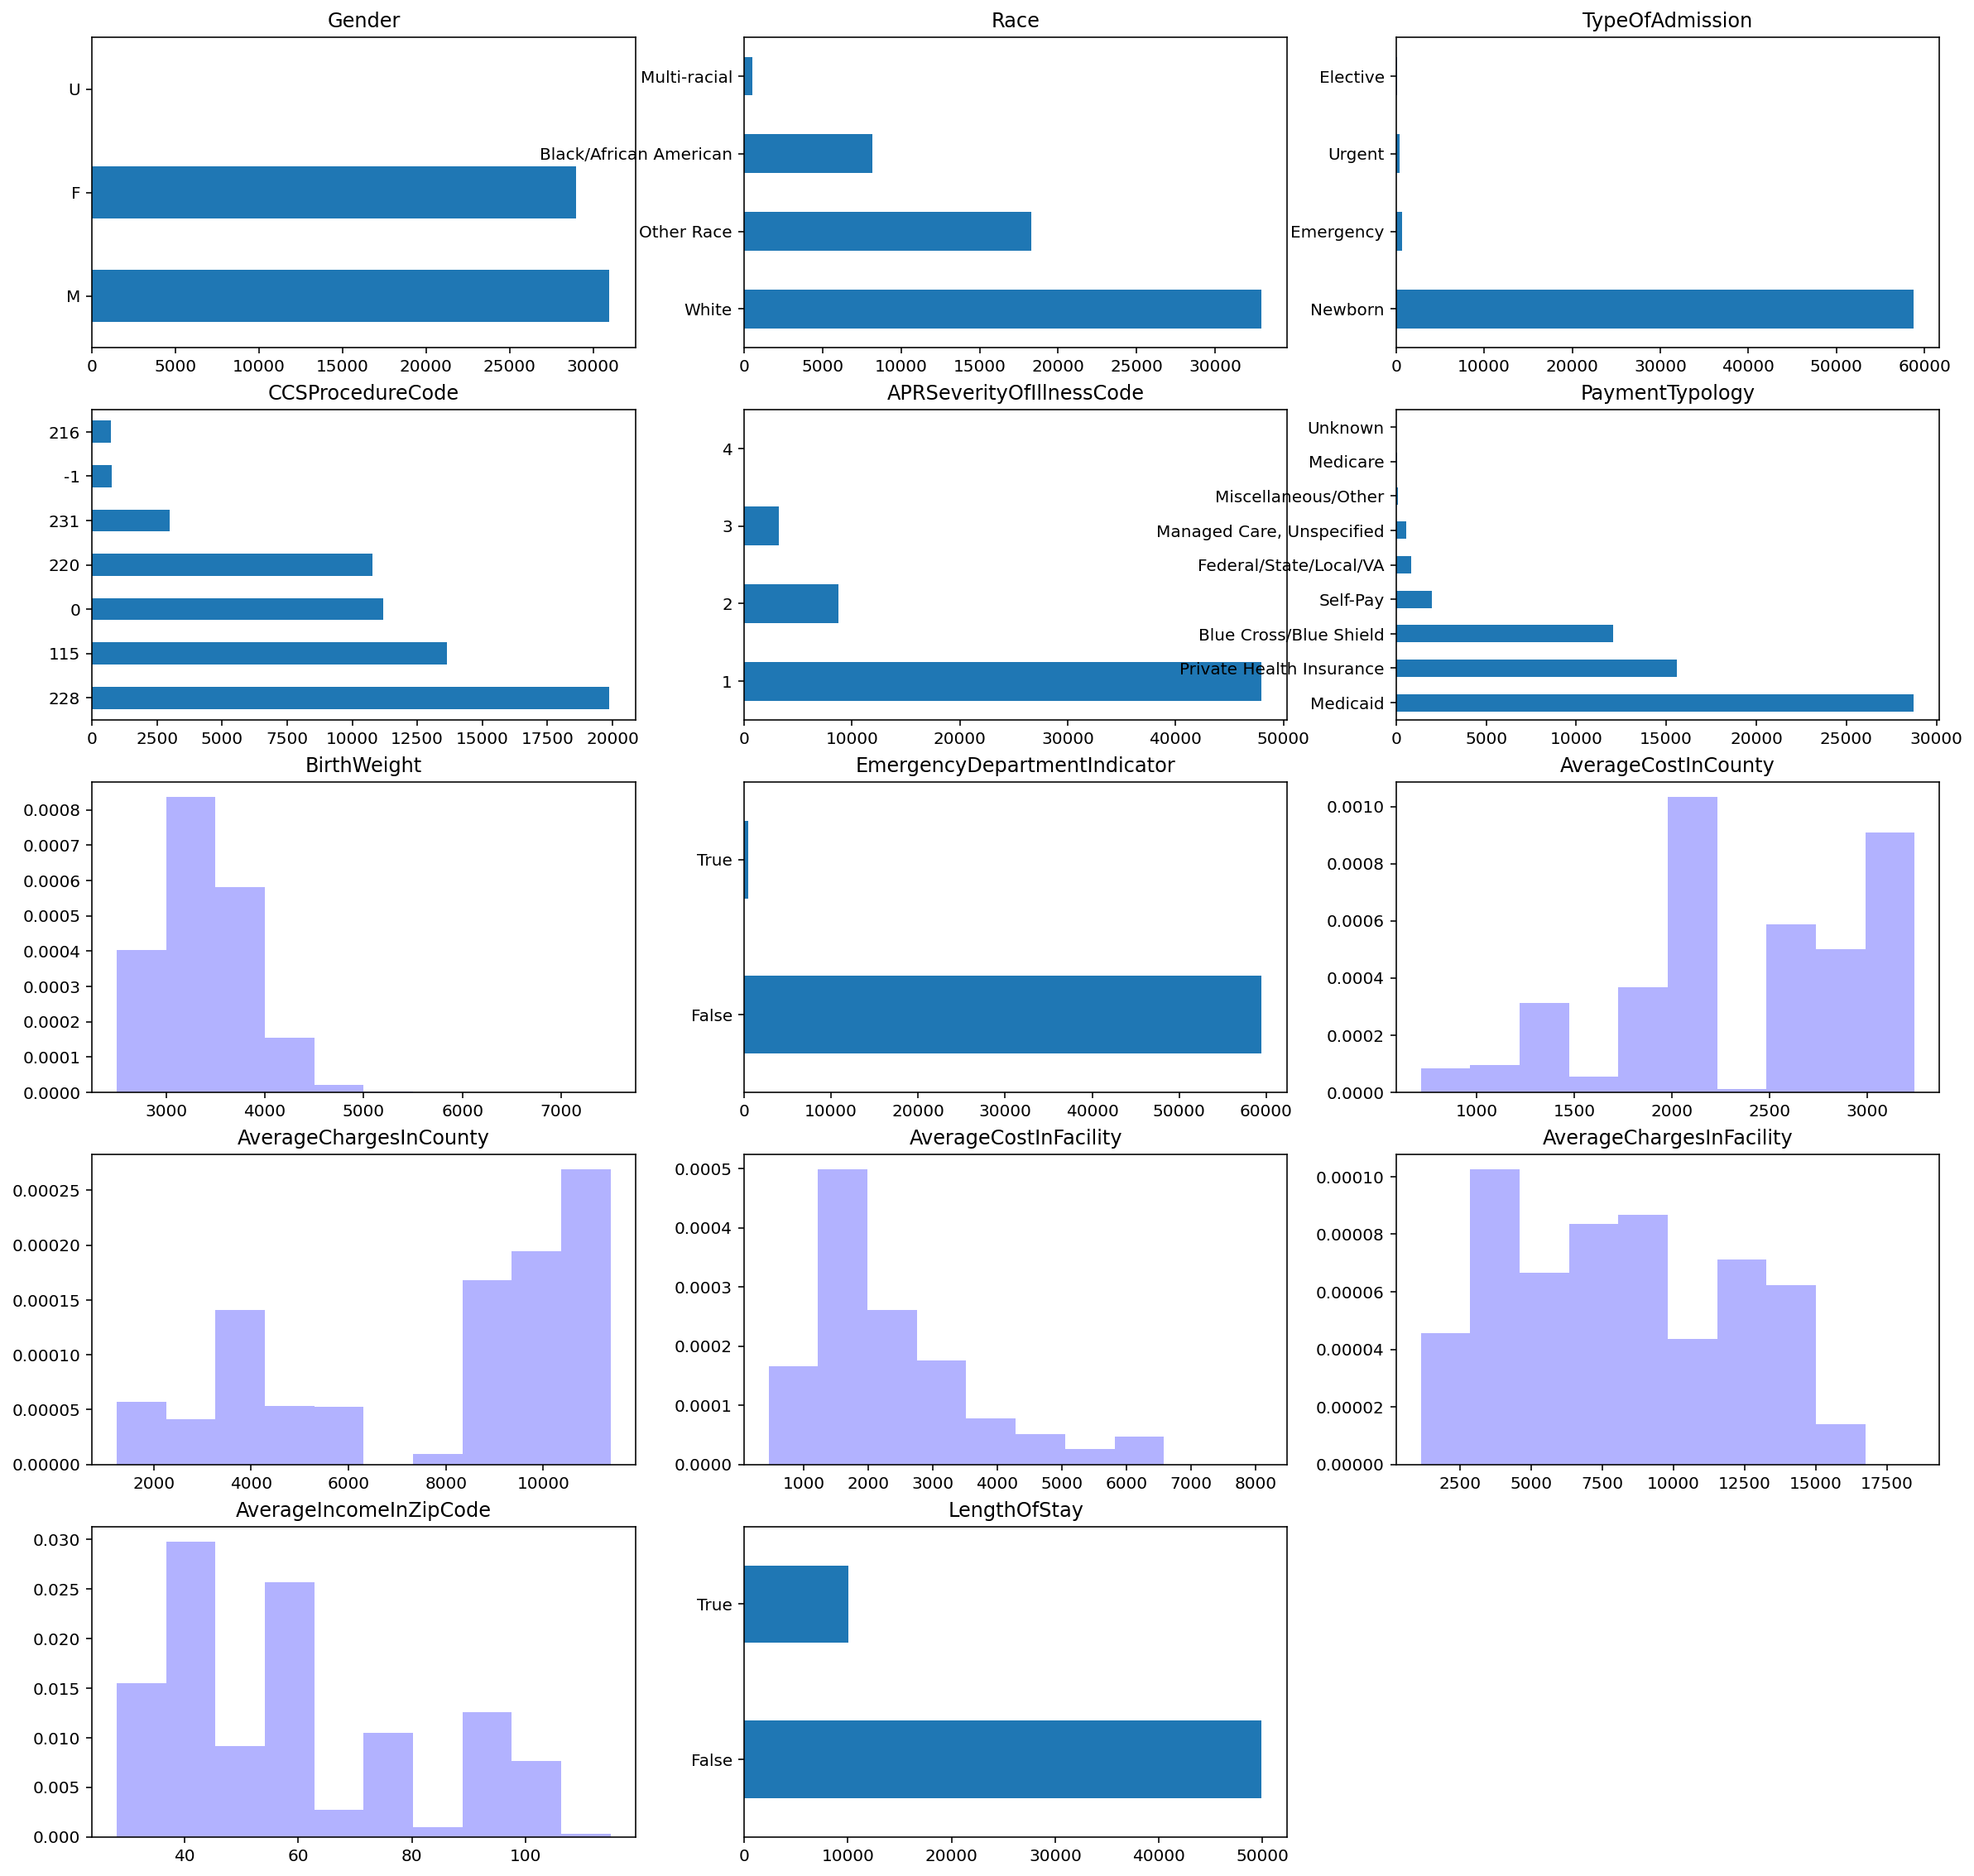

In [15]:
plt.figure(figsize=(20,20))
for i, column in enumerate(data.columns):
    plt.subplot(5,3,i+1)
    if data[column].dtype == bool:
        data[column].value_counts().plot.barh()
        plt.title(column)
    elif is_numeric_dtype(data[column]):
        plt.hist(data[column], alpha=0.3, color='b', density=True)
        plt.title(column)
    else:
        data[column].value_counts().plot.barh()
        plt.title(column)

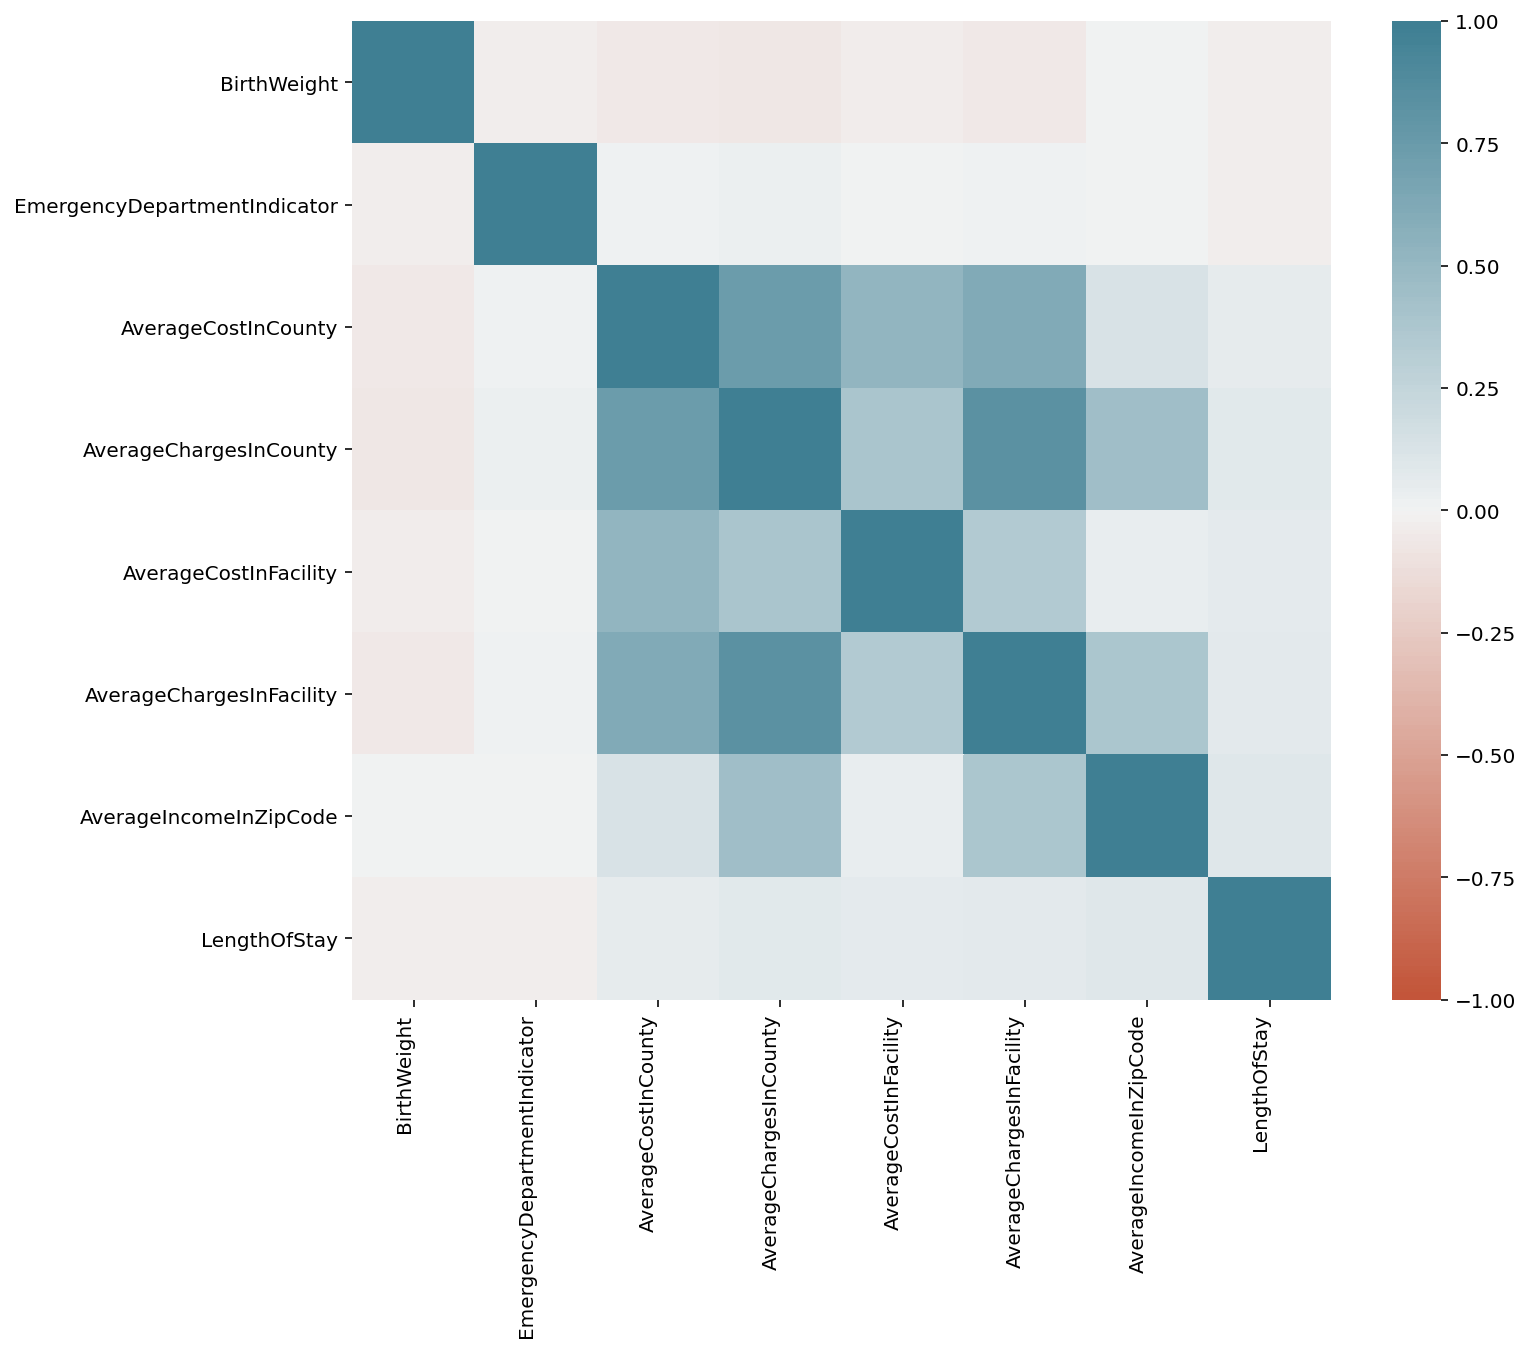

In [11]:
f, ax = plt.subplots(figsize=(11, 9))
corr = data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);